### IMPORT 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from datetime import datetime as dt2
from datetime import timedelta as td
from datetime import time as tm

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import plotly.offline as pyoff
import plotly.graph_objs as go

import feature_engine
from feature_engine.outliers import Winsorizer

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings("ignore")

### DATA PROFILING 

In [7]:
df = pd.read_excel("Data Negara (1).xlsx")

In [8]:
df.head()

,Date,Event,Angola,Armenia,Australia,Azerbaijan,Georgia,German,Indonesia,Kazakhstan,...,Serbia,Singapore,Slovakia,South Africa,Sweden,Turkey,United Arab Emirates,United Kingdom,United Stated,Vietnam
0,2022-04-26,A. First App Open,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
1,2022-04-26,B. Read Oboarding,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
2,2022-04-26,C. Sign Up,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-04-26,D. Load Topic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-04-26,E. Topic Choosed,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  3024 non-null   datetime64[ns]
 1   Event                 3024 non-null   object        
 2   Angola                3024 non-null   int64         
 3   Armenia               3024 non-null   int64         
 4   Australia             3024 non-null   int64         
 5   Azerbaijan            3024 non-null   int64         
 6   Georgia               3024 non-null   int64         
 7   German                3024 non-null   int64         
 8   Indonesia             3024 non-null   int64         
 9   Kazakhstan            3024 non-null   int64         
 10  Mexico                3024 non-null   int64         
 11  Morocco               3024 non-null   int64         
 12  Netherlands           3024 non-null   int64         
 13  Norway            

In [10]:
df.isna().sum()

Date                    0
Event                   0
Angola                  0
Armenia                 0
Australia               0
Azerbaijan              0
Georgia                 0
German                  0
Indonesia               0
Kazakhstan              0
Mexico                  0
Morocco                 0
Netherlands             0
Norway                  0
Russia                  0
Serbia                  0
Singapore               0
Slovakia                0
South Africa            0
Sweden                  0
Turkey                  0
United Arab Emirates    0
United Kingdom          0
United Stated           0
Vietnam                 0
dtype: int64

### DATA CLEANSING

In [11]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [12]:
df['Event'].value_counts()

A. First App Open              216
B. Read Oboarding              216
C. Sign Up                     216
D. Load Topic                  216
E. Topic Choosed               216
F. Load Learning Page          216
G. Sub Topic Choosed           216
H. Read Material               216
I. Correct Answer Quiz         216
J. Finish Hooray               216
K. Exercise Choosed            216
L. Exercise Choosed            216
M. Correct Answer Exercise     216
N. Finish Hooray               216
Name: Event, dtype: int64

In [13]:
df['date'] = pd.to_datetime(df['Date'])
df['date'] = df['Date'].dt.strftime('%Y-%m') 

In [14]:
df.rename(columns = {'South Africa' : 'Africa', 'United Arab Emirates' : 'Arab', 'United Kingdom' : 'UK', 'United Stated' : 'US'}, inplace = True)

In [15]:
df.head()

,Date,Event,Angola,Armenia,Australia,Azerbaijan,Georgia,German,Indonesia,Kazakhstan,...,Singapore,Slovakia,Africa,Sweden,Turkey,Arab,UK,US,Vietnam,date
0,2022-04-26,A. First App Open,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,0,2022-04
1,2022-04-26,B. Read Oboarding,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,0,2022-04
2,2022-04-26,C. Sign Up,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2022-04
3,2022-04-26,D. Load Topic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2022-04
4,2022-04-26,E. Topic Choosed,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2022-04


### Exploratory Data Analysis

In [16]:
df.describe()

,Angola,Armenia,Australia,Azerbaijan,Georgia,German,Indonesia,Kazakhstan,Mexico,Morocco,...,Serbia,Singapore,Slovakia,Africa,Sweden,Turkey,Arab,UK,US,Vietnam
count,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,...,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000
mean,0.007275,0.004960,0.001323,0.093585,0.004630,0.026786,2.384590,0.020833,0.151786,0.016534,...,0.022817,0.076720,0.054233,0.024471,0.018188,0.857474,0.086971,0.128638,0.316138,0.010582
std,0.117646,0.094376,0.057500,0.629655,0.102782,0.236323,4.237012,0.327223,0.973912,0.188289,...,0.444552,1.088873,0.723662,0.258619,0.207373,2.389439,0.786111,0.900795,3.409128,0.207103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,3.000000,3.000000,14.000000,4.000000,4.000000,54.000000,11.000000,24.000000,5.000000,...,17.000000,34.000000,20.000000,4.000000,4.000000,32.000000,22.000000,25.000000,81.000000,8.000000


In [17]:
negara = df.columns.values[2:25]

In [18]:
df_date = []
df_date = df[negara].groupby(df.date).sum()
df_date = pd.DataFrame(df_date)
df_date = df_date.reset_index()
df_date

,date,Angola,Armenia,Australia,Azerbaijan,Georgia,German,Indonesia,Kazakhstan,Mexico,...,Serbia,Singapore,Slovakia,Africa,Sweden,Turkey,Arab,UK,US,Vietnam
0,2022-04,0,0,0,0,0,0,226,0,0,...,0,0,0,0,0,0,0,1,33,0
1,2022-05,0,0,0,0,0,1,1246,0,204,...,0,0,0,0,0,352,0,175,593,0
2,2022-06,0,0,0,0,0,8,1360,0,0,...,0,0,0,36,0,249,0,34,99,0
3,2022-07,0,0,0,0,0,13,739,0,74,...,0,45,0,0,0,394,3,1,231,0
4,2022-08,0,10,0,7,0,1,681,0,108,...,0,9,0,0,0,82,73,137,0,0
5,2022-09,0,0,0,115,0,1,1156,0,24,...,0,0,0,0,35,531,5,6,0,0
6,2022-10,0,0,0,74,0,15,695,62,19,...,0,0,92,4,0,722,0,8,0,0
7,2022-11,22,5,4,87,14,42,1108,1,30,...,69,178,72,34,20,263,182,27,0,32


In [19]:
df_event = []
df_event = df[negara].groupby(df.Event).sum()
df_event = pd.DataFrame(df_event)
df_event = df_event.reset_index()
df_event

,Event,Angola,Armenia,Australia,Azerbaijan,Georgia,German,Indonesia,Kazakhstan,Mexico,...,Serbia,Singapore,Slovakia,Africa,Sweden,Turkey,Arab,UK,US,Vietnam
0,A. First App Open,1,2,0,3,1,4,146,1,8,...,1,3,2,2,2,58,3,15,344,0
1,B. Read Oboarding,4,6,3,12,3,11,452,3,25,...,3,6,6,6,4,170,3,34,360,0
2,C. Sign Up,1,1,0,3,1,2,162,1,14,...,2,2,3,3,4,52,2,11,11,0
3,D. Load Topic,3,2,1,25,1,10,582,3,24,...,1,5,4,5,4,147,17,26,16,1
4,E. Topic Choosed,2,1,0,34,1,6,651,4,35,...,2,17,6,4,5,161,18,27,18,1
5,F. Load Learning Page,2,1,0,34,1,6,651,4,35,...,2,17,6,4,4,161,18,27,18,1
6,G. Sub Topic Choosed,2,1,0,19,1,8,617,6,35,...,7,19,13,4,4,242,24,39,22,4
7,H. Read Material,2,1,0,19,1,7,617,6,35,...,7,19,13,4,4,242,24,36,21,4
8,I. Correct Answer Quiz,3,0,0,32,4,11,984,11,62,...,17,39,38,6,5,388,48,65,47,11
9,J. Finish Hooray,1,0,0,22,0,4,596,7,45,...,9,28,20,8,5,241,29,32,30,4


[Text(0.5, 1.0, 'total users by event')]

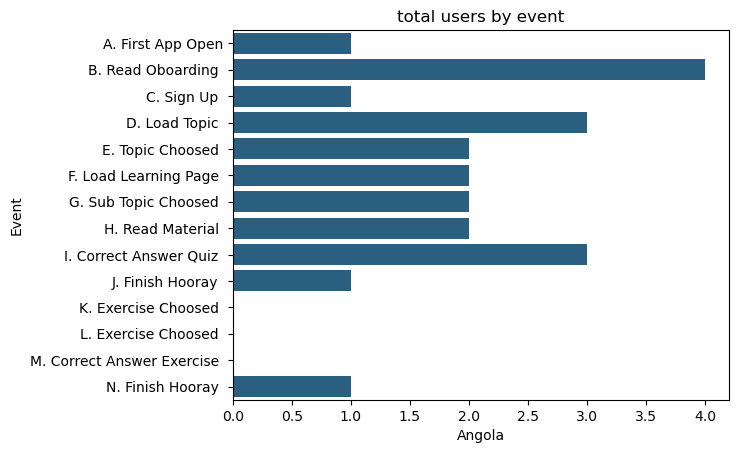

In [20]:
df_Angola = df.groupby(df.Event).Angola.sum()
df_Angola = pd.DataFrame(df_Angola)
df_Angola = df_Angola.reset_index()
sns.barplot(data = df_Angola, color = '#1D628D', x= 'Angola' , y = 'Event').set(title='total users by event')

[Text(0.5, 1.0, 'total users by event')]

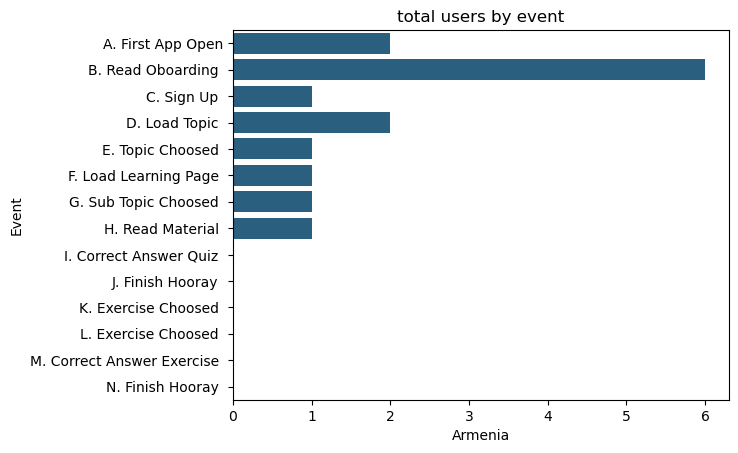

In [21]:
df_Armenia = df.groupby(df.Event).Armenia.sum()
df_Armenia = pd.DataFrame(df_Armenia)
df_Armenia = df_Armenia.reset_index()
sns.barplot(data = df_Armenia, color = '#1D628D', x= 'Armenia' , y = 'Event').set(title='total users by event')

[Text(0.5, 1.0, 'total users by event')]

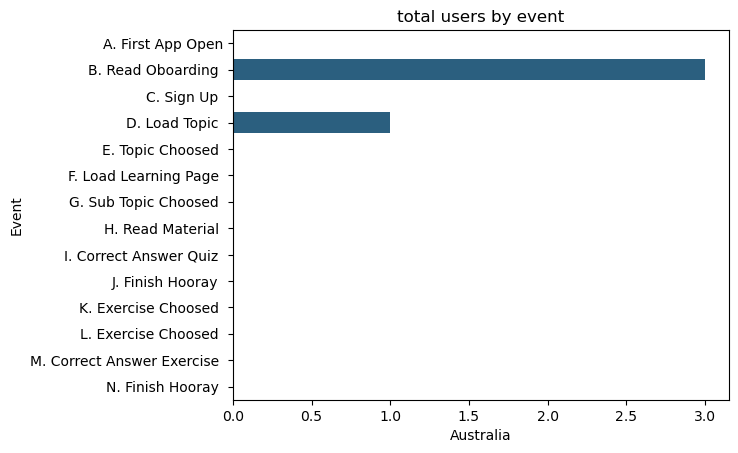

In [22]:
df_Australia = df.groupby(df.Event).Australia.sum()
df_Australia = pd.DataFrame(df_Australia)
df_Australia = df_Australia.reset_index()
sns.barplot(data = df_Australia, color = '#1D628D', x= 'Australia' , y = 'Event').set(title='total users by event')

[Text(0.5, 1.0, 'total users by event')]

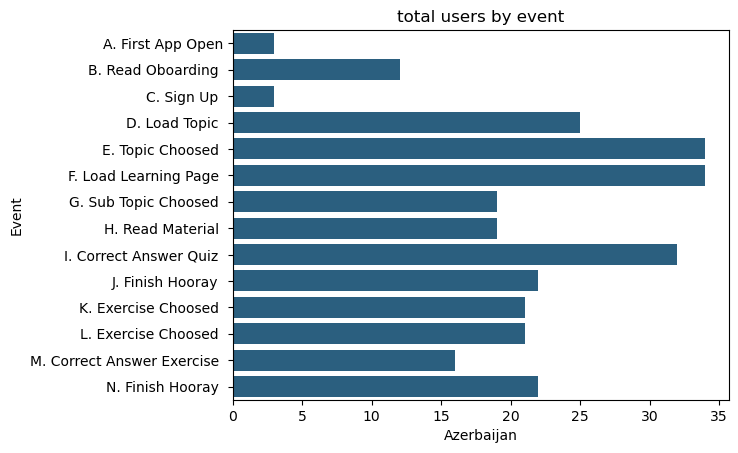

In [23]:
df_Azerbaijan = df.groupby(df.Event).Azerbaijan.sum()
df_Azerbaijan = pd.DataFrame(df_Azerbaijan)
df_Azerbaijan = df_Azerbaijan.reset_index()
sns.barplot(data = df_Azerbaijan, color = '#1D628D', x= 'Azerbaijan' , y = 'Event').set(title='total users by event')

[Text(0.5, 1.0, 'total users by event')]

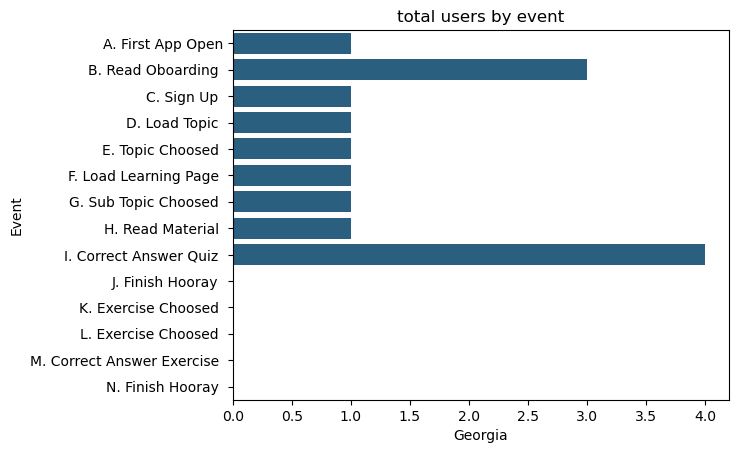

In [24]:
df_Georgia = df.groupby(df.Event).Georgia.sum()
df_Georgia = pd.DataFrame(df_Georgia)
df_Georgia = df_Georgia.reset_index()
sns.barplot(data = df_Georgia, color = '#1D628D', x= 'Georgia' , y = 'Event').set(title='total users by event')

[Text(0.5, 1.0, 'total users by event')]

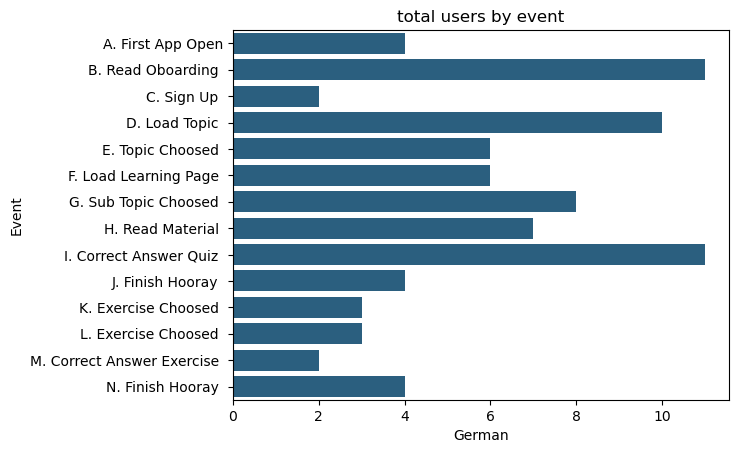

In [25]:
df_German = df.groupby(df.Event).German.sum()
df_German = pd.DataFrame(df_German)
df_German = df_German.reset_index()
sns.barplot(data = df_German, color = '#1D628D', x= 'German' , y = 'Event').set(title='total users by event')

[Text(0.5, 1.0, 'total users by event')]

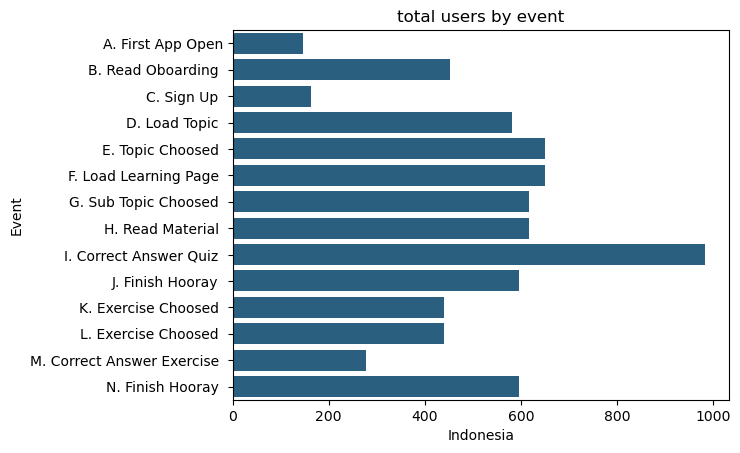

In [26]:
df_Indonesia = df.groupby(df.Event).Indonesia.sum()
df_Indonesia = pd.DataFrame(df_Indonesia)
df_Indonesia = df_Indonesia.reset_index()
sns.barplot(data = df_Indonesia, color = '#1D628D', x= 'Indonesia' , y = 'Event').set(title='total users by event')

[Text(0.5, 1.0, 'total users by event')]

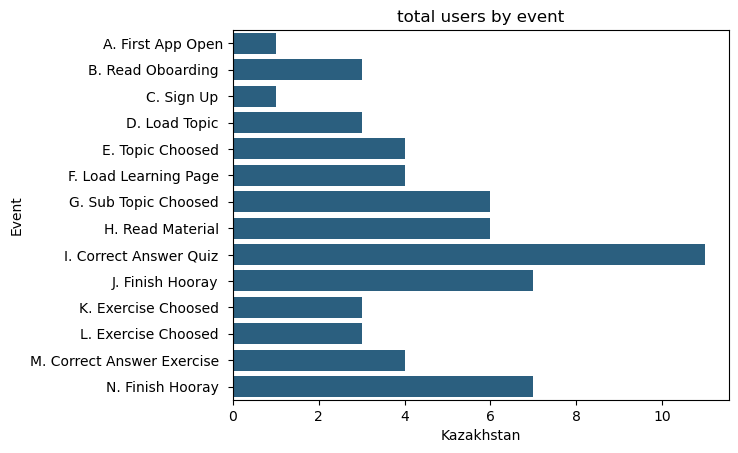

In [27]:
df_Kazakhstan = df.groupby(df.Event).Kazakhstan.sum()
df_Kazakhstan = pd.DataFrame(df_Kazakhstan)
df_Kazakhstan = df_Kazakhstan.reset_index()
sns.barplot(data = df_Kazakhstan, color = '#1D628D', x= 'Kazakhstan' , y = 'Event').set(title='total users by event')

[Text(0.5, 1.0, 'total users by event')]

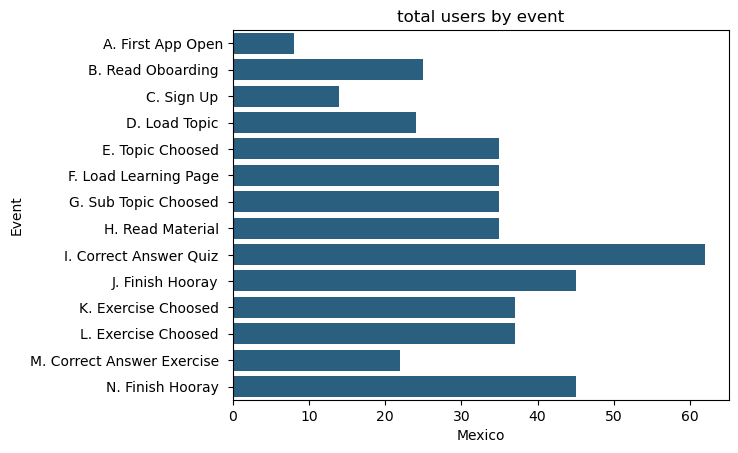

In [28]:
df_Mexico = df.groupby(df.Event).Mexico.sum()
df_Mexico = pd.DataFrame(df_Mexico)
df_Mexico = df_Mexico.reset_index()
sns.barplot(data = df_Mexico, color = '#1D628D', x= 'Mexico' , y = 'Event').set(title='total users by event')

[Text(0.5, 1.0, 'total users by event')]

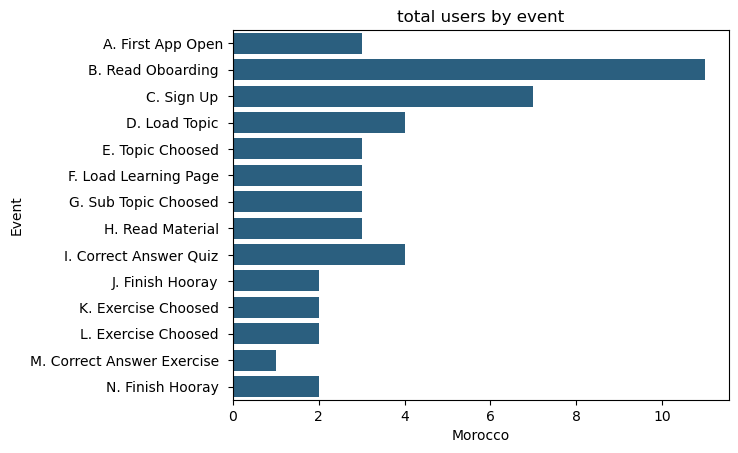

In [29]:
df_Morocco = df.groupby(df.Event).Morocco.sum()
df_Morocco = pd.DataFrame(df_Morocco)
df_Morocco = df_Morocco.reset_index()
sns.barplot(data = df_Morocco, color = '#1D628D', x= 'Morocco' , y = 'Event').set(title='total users by event')

[Text(0.5, 1.0, 'total users by event')]

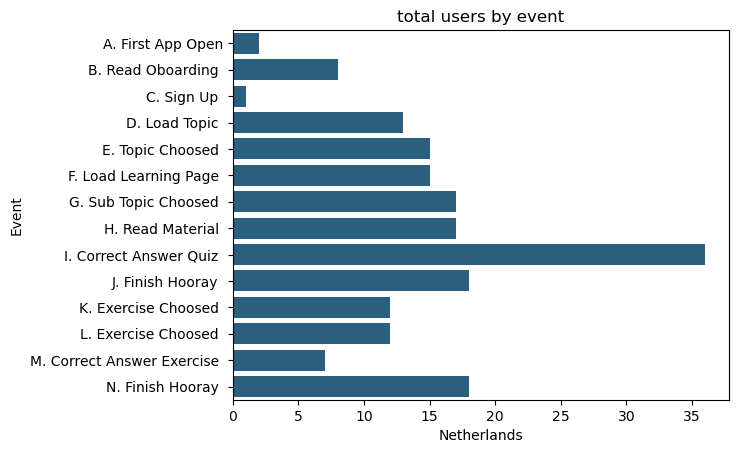

In [30]:
df_Netherlands = df.groupby(df.Event).Netherlands.sum()
df_Netherlands = pd.DataFrame(df_Netherlands)
df_Netherlands = df_Netherlands.reset_index()
sns.barplot(data = df_Netherlands, color = '#1D628D', x= 'Netherlands' , y = 'Event').set(title='total users by event')

[Text(0.5, 1.0, 'total users by event')]

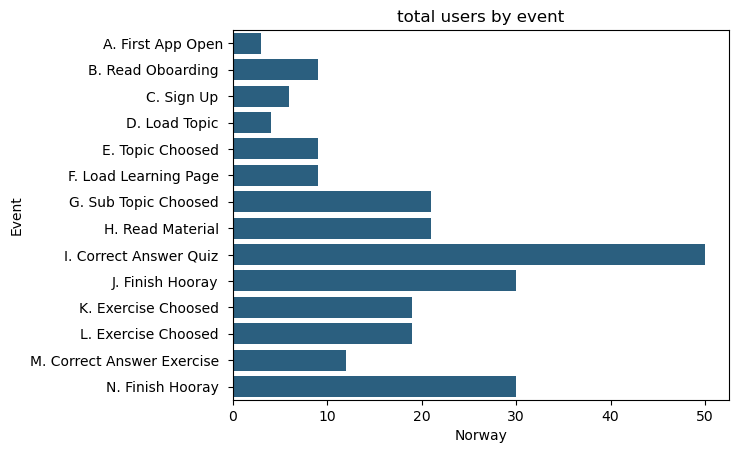

In [31]:
df_Norway = df.groupby(df.Event).Norway.sum()
df_Norway = pd.DataFrame(df_Norway)
df_Norway = df_Norway.reset_index()
sns.barplot(data = df_Norway, color = '#1D628D', x= 'Norway' , y = 'Event').set(title='total users by event')

[Text(0.5, 1.0, 'total users by event')]

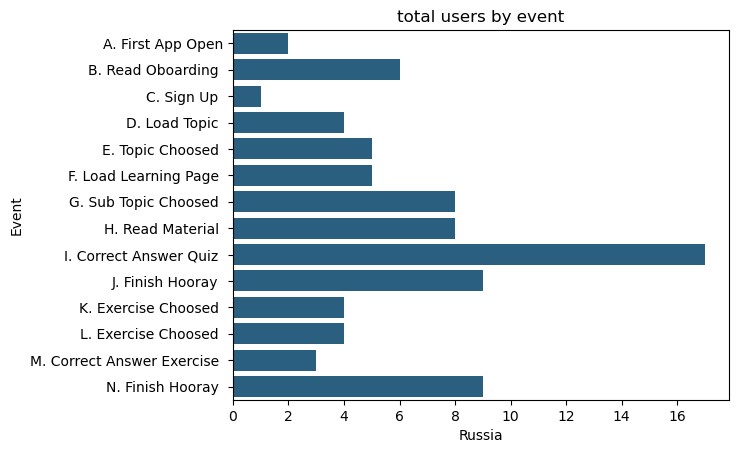

In [32]:
df_Russia = df.groupby(df.Event).Russia.sum()
df_Russia = pd.DataFrame(df_Russia)
df_Russia = df_Russia.reset_index()
sns.barplot(data = df_Russia, color = '#1D628D', x= 'Russia' , y = 'Event').set(title='total users by event')

[Text(0.5, 1.0, 'total users by event')]

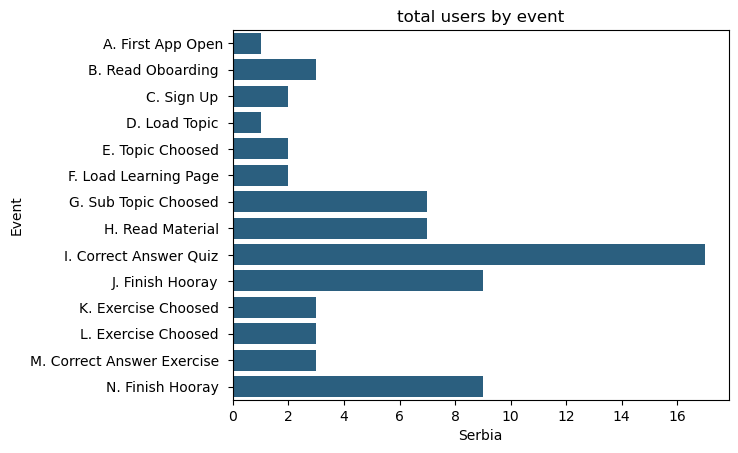

In [33]:
df_Serbia= df.groupby(df.Event).Serbia.sum()
df_Serbia = pd.DataFrame(df_Serbia)
df_Serbia = df_Serbia.reset_index()
sns.barplot(data = df_Serbia, color = '#1D628D', x= 'Serbia' , y = 'Event').set(title='total users by event')

[Text(0.5, 1.0, 'total users by event')]

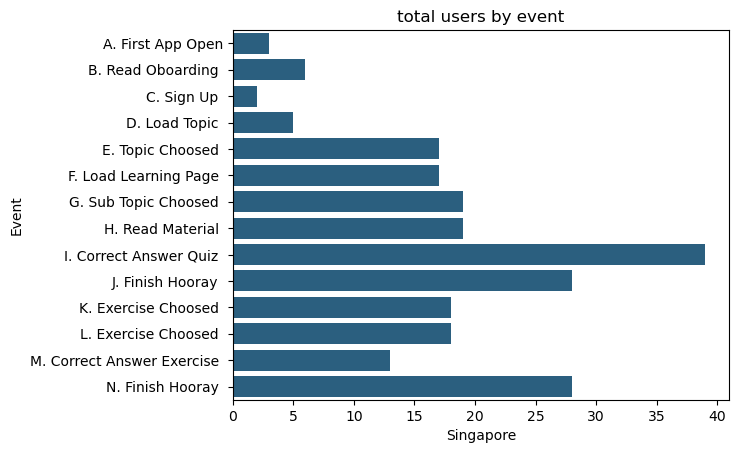

In [34]:
df_Singapore = df.groupby(df.Event).Singapore.sum()
df_Singapore = pd.DataFrame(df_Singapore)
df_Singapore = df_Singapore.reset_index()
sns.barplot(data = df_Singapore, color = '#1D628D', x= 'Singapore' , y = 'Event').set(title='total users by event')

[Text(0.5, 1.0, 'total users by event')]

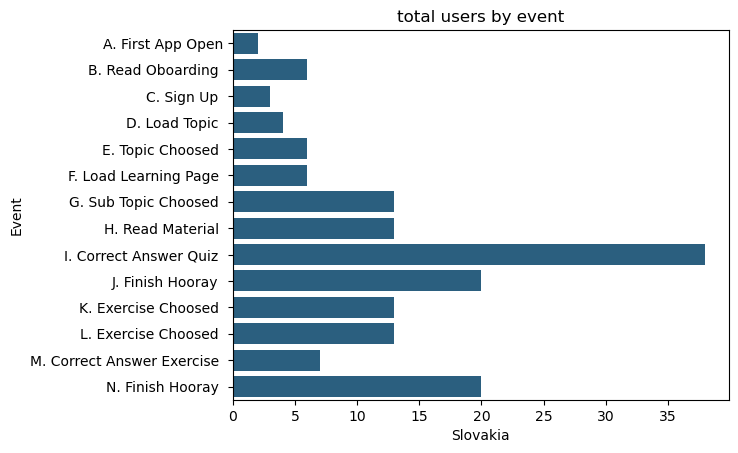

In [35]:
df_Slovakia = df.groupby(df.Event).Slovakia.sum()
df_Slovakia = pd.DataFrame(df_Slovakia)
df_Slovakia = df_Slovakia.reset_index()
sns.barplot(data = df_Slovakia, color = '#1D628D', x= 'Slovakia' , y = 'Event').set(title='total users by event')

[Text(0.5, 1.0, 'total users by event')]

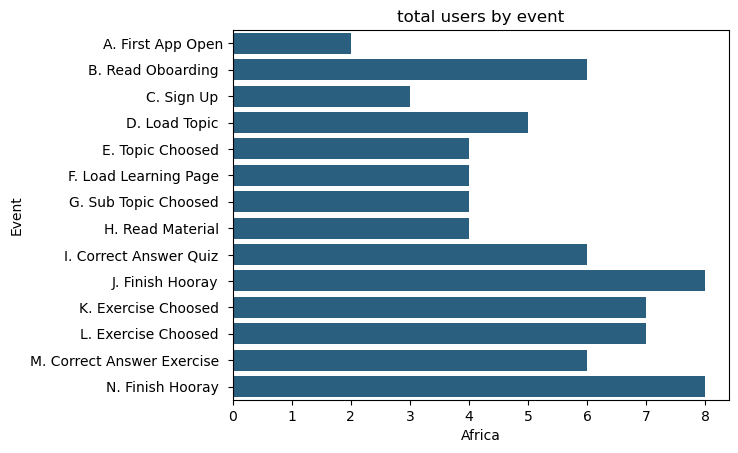

In [36]:
df_Africa = df.groupby(df.Event).Africa.sum()
df_Africa = pd.DataFrame(df_Africa)
df_Africa = df_Africa.reset_index()
sns.barplot(data = df_Africa, color = '#1D628D', x= 'Africa' , y = 'Event').set(title='total users by event')

[Text(0.5, 1.0, 'total users by event')]

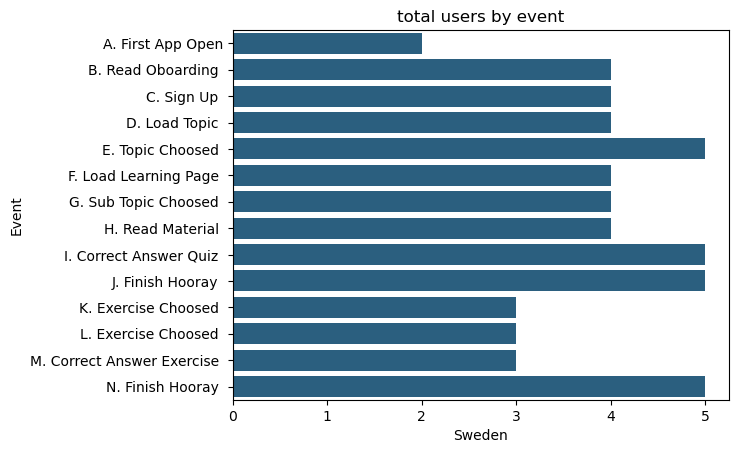

In [37]:
df_Sweden = df.groupby(df.Event).Sweden.sum()
df_Sweden = pd.DataFrame(df_Sweden)
df_Sweden = df_Sweden.reset_index()
sns.barplot(data = df_Sweden, color = '#1D628D', x= 'Sweden' , y = 'Event').set(title='total users by event')

[Text(0.5, 1.0, 'total users by event')]

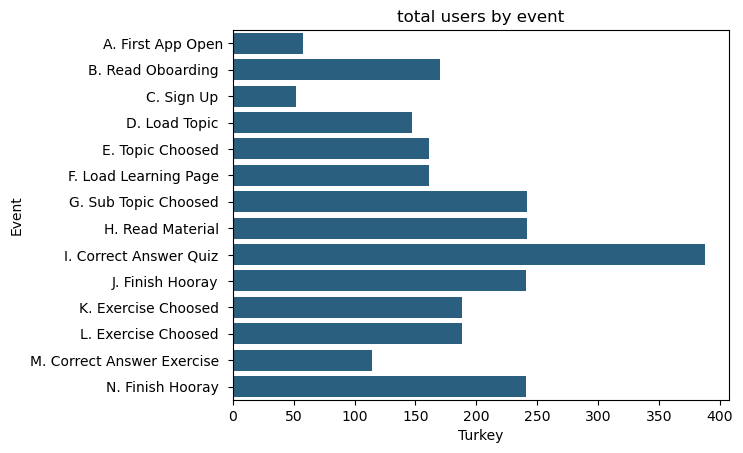

In [38]:
df_Turkey = df.groupby(df.Event).Turkey.sum()
df_Turkey = pd.DataFrame(df_Turkey)
df_Turkey = df_Turkey.reset_index()
sns.barplot(data = df_Turkey, color = '#1D628D', x= 'Turkey' , y = 'Event').set(title='total users by event')

[Text(0.5, 1.0, 'total users by event')]

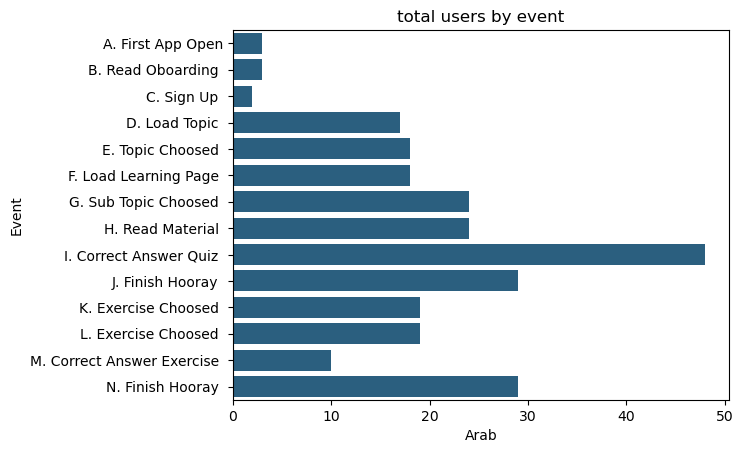

In [39]:
df_Arab = df.groupby(df.Event).Arab.sum()
df_Arab = pd.DataFrame(df_Arab)
df_Arab = df_Arab.reset_index()
sns.barplot(data = df_Arab, color = '#1D628D', x= 'Arab' , y = 'Event').set(title='total users by event')

[Text(0.5, 1.0, 'total users by event')]

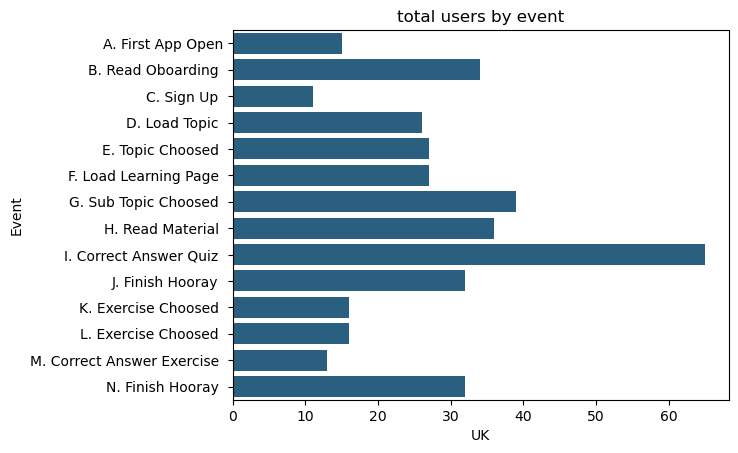

In [40]:
df_UK = df.groupby(df.Event).UK.sum()
df_UK = pd.DataFrame(df_UK)
df_UK  = df_UK.reset_index()
sns.barplot(data = df_UK, color = '#1D628D', x= 'UK' , y = 'Event').set(title='total users by event')

[Text(0.5, 1.0, 'total users by event')]

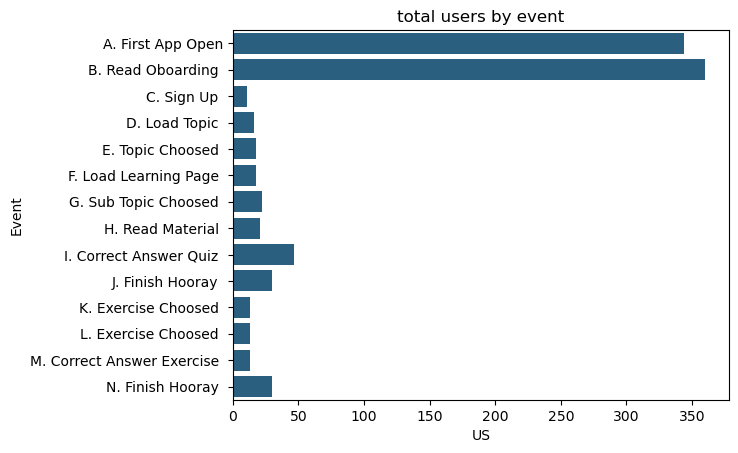

In [41]:
df_US = df.groupby(df.Event).US.sum()
df_US = pd.DataFrame(df_US)
df_US  = df_US.reset_index()
sns.barplot(data = df_US, color = '#1D628D', x= 'US' , y = 'Event').set(title='total users by event')

[Text(0.5, 1.0, 'total users by event')]

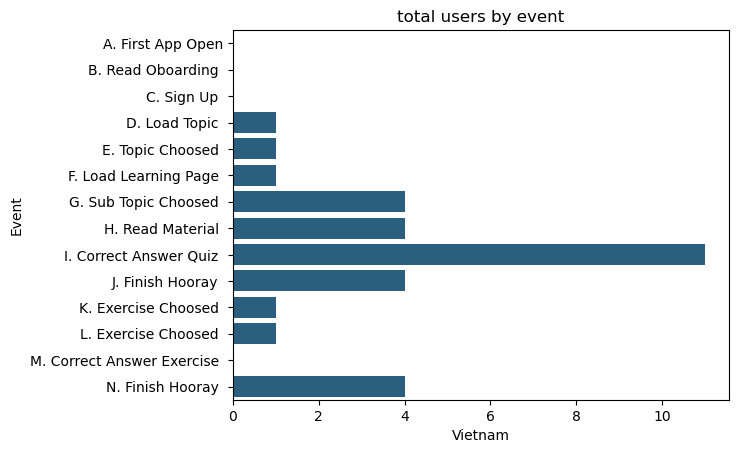

In [42]:
df_Vietnam = df.groupby(df.Event).Vietnam.sum()
df_Vietnam = pd.DataFrame(df_Vietnam)
df_Vietnam = df_Vietnam.reset_index()
sns.barplot(data = df_Vietnam, color = '#1D628D', x= 'Vietnam' , y = 'Event').set(title='total users by event')

In [94]:
#df_month = df.groupby(df.Date.dt.month).Indonesia.sum()
#df_month = pd.DataFrame(df_month)
#df_month = df_month.reset_index()
#df_month

In [93]:
# sns.lineplot(data = df_month,  color = '#1D628D', x= 'Date' , y = 'Indonesia')

In [96]:
negara = df.columns.values[2:25]

<AxesSubplot:>

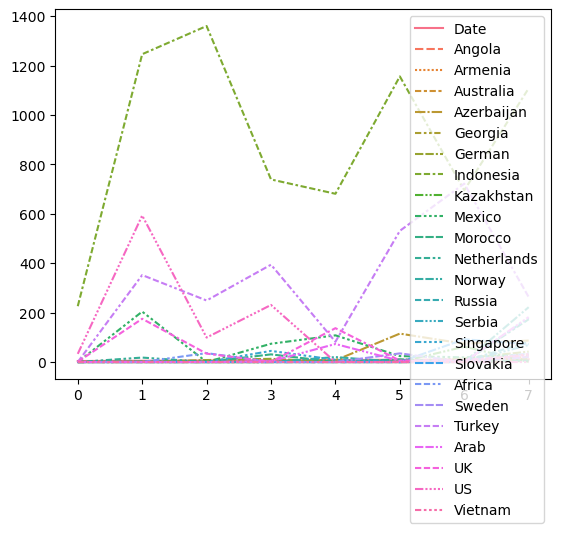

In [75]:
sns.lineplot(data=df_month)

In [48]:
df_month = df.groupby(df.Date.dt.month).sum()
df_month = pd.DataFrame(df_month)
df_month = df_month.reset_index()
df_month

,Date,Angola,Armenia,Australia,Azerbaijan,Georgia,German,Indonesia,Kazakhstan,Mexico,...,Serbia,Singapore,Slovakia,Africa,Sweden,Turkey,Arab,UK,US,Vietnam
0,4,0,0,0,0,0,0,226,0,0,...,0,0,0,0,0,0,0,1,33,0
1,5,0,0,0,0,0,1,1246,0,204,...,0,0,0,0,0,352,0,175,593,0
2,6,0,0,0,0,0,8,1360,0,0,...,0,0,0,36,0,249,0,34,99,0
3,7,0,0,0,0,0,13,739,0,74,...,0,45,0,0,0,394,3,1,231,0
4,8,0,10,0,7,0,1,681,0,108,...,0,9,0,0,0,82,73,137,0,0
5,9,0,0,0,115,0,1,1156,0,24,...,0,0,0,0,35,531,5,6,0,0
6,10,0,0,0,74,0,15,695,62,19,...,0,0,92,4,0,722,0,8,0,0
7,11,22,5,4,87,14,42,1108,1,30,...,69,178,72,34,20,263,182,27,0,32


<AxesSubplot:xlabel='Date', ylabel='Indonesia'>

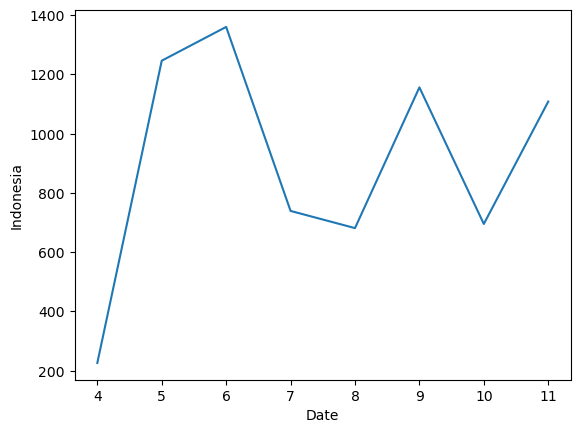

In [92]:
sns.lineplot(data = df_month, palette = 'orange', x= 'Date' , y = 'Indonesia')

In [99]:
# df.groupby(['Date'])[['Indonesia', 'Turkey']].sum().plot(marker='o', linestyle='-',linewidth=2)

In [ ]:
plt.figure(figsize=(16,5))
plt.title('top 3 country')
plt.plot(df_April.date.dt.month, df_April.index)
plt.xticks(df_April.date.dt.month)
plt.ylabel('Date')
plt.xlabel('index')
plt.show()

In [ ]:
show_percent(data=df_month)

plt.figure(figsize=(16,5))
plt.title('Total by Date')
plt.plot(df_April.date.dt.month, df_April., label='2011')
plt.plot(df_2012.date.dt.month, df_2012.grand_total, label='2012')
plt.plot(df_2013.date.dt.month, df_2013.grand_total, label='2013')
plt.plot(df_2014.date.dt.month, df_2014.grand_total, label='2014')
plt.xticks(df_2014.date.dt.month)
plt.legend(loc='upper left')
plt.ylabel('grand_total')
plt.xlabel('Month')
plt.show()

In [ ]:
negara = df.columns.values[2:25]

negara = df.query("date == '4'")
sns.lineplot(data=negara, x="date", y="Turkey")